**importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

**mounting drive from the Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**selecting the dataset**

In [53]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tt codes/university_data.csv')
df.columns=[x.strip() for x in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [22]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**EDA Tasks:**

In [5]:
def boxplot(y_column):
    columns=['University Rating','SOP','LOR','Research']
    fig = plt.figure(figsize=(30, 5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i in range(1,len(columns)+1):
        ax=fig.add_subplot(1, len(columns), i)
        ax=sns.boxplot(x=columns[i-1],y=y_column,data=df)

**1. Plot box plots for GRE and TOEFL scores**


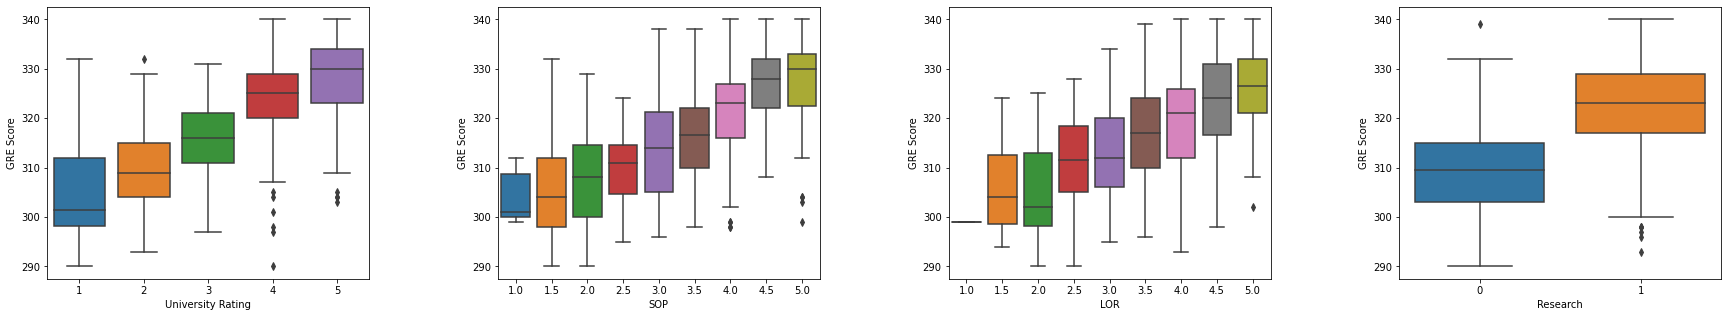

In [6]:
boxplot('GRE Score')

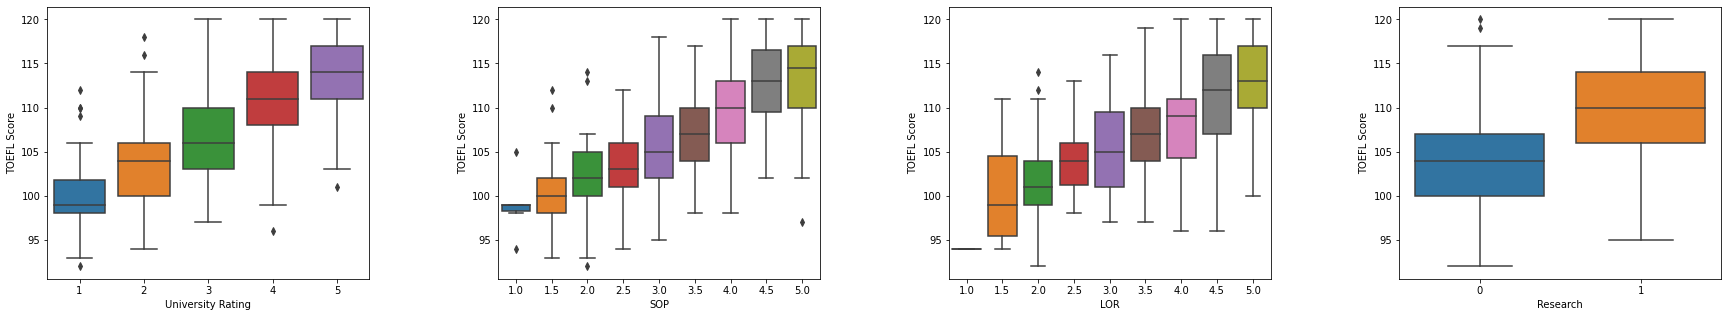

In [7]:
boxplot('TOEFL Score')

**2. Plot a histogram for University rating.**

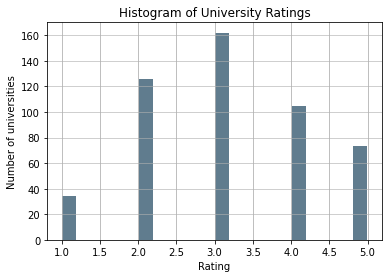

In [8]:
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
commutes = df['University Rating']

commutes.plot.hist(grid=True, bins=20, rwidth=.9,
                   color='#607c8e')
plt.title('Histogram of University Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of universities')
plt.grid(axis='y', alpha=0.75)


**3. Plot a scatter plot of CGPA vs. Chance of Admit**

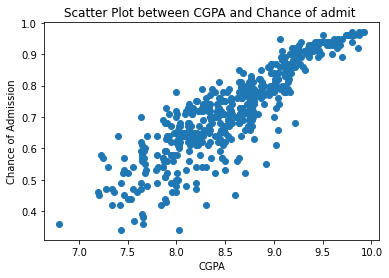

In [9]:

plt.scatter( df['CGPA'], df['Chance of Admit'])

plt.title('Scatter Plot between CGPA and Chance of admit ')

plt.xlabel('CGPA')

plt.ylabel('Chance of Admission')

plt.show()

**Prediction Tasks:**

In [103]:
y = df['Chance of Admit'].values
#df= df.drop(['Chance of Admit'], axis=1)
x = df.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(x, y)


In [63]:
X_train.shape

(375, 8)

**1. Apply simple linear regression**

In [40]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print(regressor.intercept_)
print(regressor.coef_)

zip(df.iloc[:, :-1].values, regressor.coef_)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

-1.2630871087787447
[7.50549467e-05 1.64138411e-03 2.49947627e-03 2.80207919e-03
 8.35966927e-03 1.30593440e-02 1.26137804e-01 2.35937305e-02]


In [42]:
mean_squared_error(y_test, y_pred)

0.003443588037580703

In [43]:
mean_absolute_error(y_test, y_pred)

0.045773759790433036

**2. Apply polynomial regression with degree=3**

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Predicting a new result with Polymonial Regression
ans = pol_reg.predict(poly_reg.fit_transform(X_test))

In [77]:
ans.shape

(125,)

Text(0, 0.5, 'Chance of Admit')

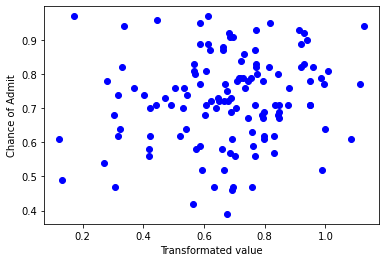

In [80]:
#Plotting
plt.scatter(ans, y_test,  color='blue')
plt.xlabel("Predicted value")
plt.ylabel("Chance of Admit")

In [86]:
#Evaluation
test_x_poly = poly.fit_transform(X_test)
test_y = ans
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_test) )

Mean absolute error: 0.18
Residual sum of squares (MSE): 0.05
R2-score: -0.26


**1. Apply ridge regression**

In [88]:
regressor = Ridge(alpha=1.0)
regressor.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [89]:
print(regressor.intercept_)
print(regressor.coef_)

zip(df.iloc[:, :-1].values, regressor.coef_)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

-1.475373631794196
[1.04675435e-04 2.47498206e-03 3.17506650e-03 6.14206211e-03
 4.63632718e-03 1.61668370e-02 1.10367457e-01 1.63134177e-02]


In [90]:
mean_squared_error(y_test, y_pred)

0.0032396659501024625

In [91]:
mean_absolute_error(y_test, y_pred)

0.04243925588852187

**1. Apply lasso regression**

In [92]:
regressor = Lasso(alpha=1.0)
regressor.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
print(regressor.intercept_)
print(regressor.coef_)

zip(df.iloc[:, :-1].values, regressor.coef_)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

-0.13834557307579975
[8.67677618e-08 2.71440421e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [94]:
mean_squared_error(y_test, y_pred)

0.012085000955148214

In [95]:
mean_absolute_error(y_test, y_pred)

0.08686652773910933

**Standardization**

In [107]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)

In [111]:
X_train[:2]

array([[ 0.59021714,  0.20855444,  0.47590263, -0.10193655, -0.39196348,
        -1.04790158,  0.32770631, -1.11602374],
       [-0.79195834,  1.10133886,  0.47590263, -0.97071397,  0.62173517,
        -0.51398434,  0.92353598,  0.89603829]])

In [110]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_test)
X_test=scaler.transform(X_test)
X_test[:1]

array([[-0.55551992, -0.59913778, -0.51722481, -0.98935535, -1.33659893,
        -1.11754804, -0.44823797, -1.16554303]])

**1. Apply simple linear regression**

after standardization

In [112]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
print(regressor.intercept_)
print(regressor.coef_)

zip(df.iloc[:, :-1].values, regressor.coef_)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

0.7262399999999997
[0.00894354 0.02271007 0.01763753 0.00630672 0.00632831 0.01401189
 0.06984317 0.00656861]


In [114]:
mean_squared_error(y_test, y_pred)

0.004445111376902821

In [115]:
mean_absolute_error(y_test, y_pred)

0.045751738625724

**2. Apply polynomial regression with degree=3**

In [116]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
# Predicting a new result with Polymonial Regression
ans = pol_reg.predict(poly_reg.fit_transform(X_test))

In [118]:
ans.shape

(125,)

Text(0, 0.5, 'Chance of Admit')

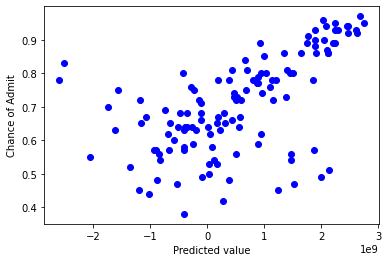

In [119]:
#Plotting
plt.scatter(ans, y_test,  color='blue')
#XX = np.arange(0.0, 10.0, 0.1)
#yy = pol_reg.intercept_[0]+ pol_reg.coef_[0][1]*XX+ pol_reg.coef_[0][2]*np.power(XX, 2)
#plt.plot(XX, yy, '-r' )
plt.xlabel("Predicted value")
plt.ylabel("Chance of Admit")

In [120]:
#Evaluation
test_x_poly = poly.fit_transform(X_test)
test_y = ans
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_test) )

Mean absolute error: 1065325771.86
Residual sum of squares (MSE): 1731001924362113536.00
R2-score: -0.20


**1. Apply ridge regression**

after standardization

In [121]:
regressor = Ridge(alpha=1.0)
regressor.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [122]:
print(regressor.intercept_)
print(regressor.coef_)

zip(df.iloc[:, :-1].values, regressor.coef_)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

0.7262399999999998
[0.00893034 0.02290258 0.01782345 0.00639251 0.00645117 0.01409178
 0.06912722 0.0066025 ]


In [123]:
mean_squared_error(y_test, y_pred)

0.004445379991651673

In [124]:
mean_absolute_error(y_test, y_pred)

0.04571355157045438

**1. Apply lasso regression**

after standardization

In [129]:
regressor = Lasso(alpha=0.8)
regressor.fit(X_train, y_train)

Lasso(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [130]:
print(regressor.intercept_)
print(regressor.coef_)

zip(df.iloc[:, :-1].values, regressor.coef_)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

0.7262400000000001
[-0.  0.  0.  0.  0.  0.  0.  0.]


In [131]:
mean_squared_error(y_test, y_pred)

0.021450502400000005

In [132]:
mean_absolute_error(y_test, y_pred)

0.12340928000000002